# Import Libraries

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import KFold
import numpy as np
#from sklearn import preprocessing
#min_max_scaler = preprocessing.MinMaxScaler()
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy.stats import norm
import pylab
from statsmodels.stats.diagnostic import lilliefors

path = r"C:\Users\NCBLRL354\Downloads\bquxjob_2c985331_17f225d74d4.csv"

# Read Data

In [44]:
df = pd.read_csv(path)
df1 = pd.read_csv((r"D:\panalytics.csv"))

# Pre processing

In [45]:
df1 = df1.drop(columns = ["Unnamed: 0","cfs"])
df = df.drop(columns = ["predictionsRF","predictionsLinearReg"])
df = df.rename(columns = {"business_name":"fname"})
df = df.replace(0,np.nan)
df = df.dropna(subset=['t3','t2','t1','t'])

# Concat

In [46]:
df_c = pd.concat([df,df1])
df_c

,fname,t3,t2,t1,t
0,MALNAD CAR CLUB,-506709.00,1375653.00,-569585.00,2454000.00
1,SAI MURUGAN SILKS,-2800203.73,-6581082.47,-1631823.51,13145166.00
2,M/S RAHUL TRADERS,-13770987.00,1594963.00,-2417534.00,26965886.00
3,PARESH TEA CO PVT LTD,-31193030.00,41009203.00,-3355099.00,56677564.00
4,VANDAN TRADERS,-945000.00,-26683260.96,27833850.87,478283.65
...,...,...,...,...,...
802,D:\tmp\1640868325eoulmnyj_81244_123500197_7710...,-1356254.00,257152.00,171123.00,2555167.00
803,D:\tmp\1640882268emwbquqo_81244_123500204_7710...,-41528242.00,23104335.00,-13278801.00,34019205.00
804,D:\tmp\1640882268qyyzfppr_81244_123500204_7710...,-17952143.00,4093730.00,4651868.00,21014686.00
805,D:\tmp\1640883632nnftkhoo_81244_123500213_7710...,-4246590.00,-4837144.00,5809805.00,11834439.00


# Data normality test (lilliefors test)

In [47]:
lilliefors(df_c.t)

(0.3980051114286762, 0.0009999999999998899)

In [48]:
lilliefors(df_c.t1)

(0.3334217014006653, 0.0009999999999998899)

In [49]:
lilliefors(df_c.t2)

(0.35390880991078294, 0.0009999999999998899)

In [50]:
lilliefors(df_c.t3)

(0.3774613682291933, 0.0009999999999998899)

<AxesSubplot:ylabel='Density'>

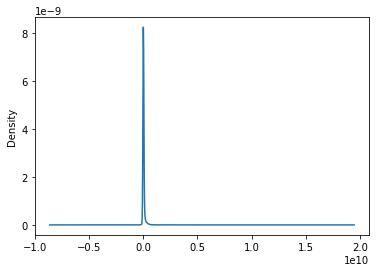

In [51]:
df_c["t"].plot(kind = "density")

# Outlier Analysis

In [52]:
print("Highest t allowed",df_c['t'].mean() + 3*df_c['t'].std())
print("Lowest t allowed",df_c['t'].mean() - 3*df_c['t'].std())

h_t = df_c['t'].mean() + 3*df_c['t'].std()
l_t = df_c['t'].mean() - 3*df_c['t'].std()

print("Highest t1 allowed",df_c['t1'].mean() + 3*df_c['t1'].std())
print("Lowest t1 allowed",df_c['t1'].mean() - 3*df_c['t1'].std())

h_t1 = df_c['t1'].mean() + 3*df_c['t1'].std()
l_t1 = df_c['t1'].mean() - 3*df_c['t1'].std()


print("Highest t2 allowed",df_c['t2'].mean() + 3*df_c['t2'].std())
print("Lowest t2 allowed",df_c['t2'].mean() - 3*df_c['t2'].std())

h_t2 = df_c['t2'].mean() + 3*df_c['t2'].std()
l_t2 = df_c['t2'].mean() - 3*df_c['t2'].std()

print("Highest t3 allowed",df_c['t3'].mean() + 3*df_c['t3'].std())
print("Lowest t3 allowed",df_c['t3'].mean() - 3*df_c['t3'].std())

h_t3 = df_c['t3'].mean() + 3*df_c['t3'].std()
l_t3 = df_c['t3'].mean() - 3*df_c['t3'].std()

Highest t allowed 785342953.8496411
Lowest t allowed -706987960.8270633
Highest t1 allowed 188595304.0470349
Lowest t1 allowed -178268976.90498552
Highest t2 allowed 188446493.62358376
Lowest t2 allowed -186013115.90854582
Highest t3 allowed 436963627.2731088
Lowest t3 allowed -478240394.7046898


# Outlier Removal

In [53]:
df_c = df_c[(df_c.t <h_t)&(df_c.t> l_t)]
df_c = df_c[(df_c.t1 <h_t1)&(df_c.t1> l_t1)]
df_c = df_c[(df_c.t2 <h_t2)&(df_c.t2> l_t2)]
df_c = df_c[(df_c.t3 <h_t3)&(df_c.t3> l_t3)]

In [54]:
scaler = StandardScaler()

In [55]:
dfs = pd.DataFrame(scaler.fit_transform(df_c[['t3',"t2","t1","t"]]),columns=['t3',"t2","t1","t"])

In [56]:
#resering index
df_c = df_c.reset_index(drop = True)

In [57]:
#Replacing values in original concatonated data
df_c[['t3',"t2","t1","t"]] = dfs[['t3',"t2","t1","t"]]

In [58]:
def inverse_transform(df):
    return pd.DataFrame(scaler.inverse_transform(df[['t3',"t2","t1","t"]]),columns = ['t3',"t2","t1","t"])

# Training and Testing Model

In [59]:
from sklearn.svm import SVR
clf = SVR(kernel="linear", C=100, gamma="auto")

In [60]:
clf

SVR(C=100, gamma='auto', kernel='linear')

In [61]:
X = df_c[['t3',"t2","t1"]]
y = df_c.t
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.2)

In [62]:
clf.fit(X_train, y_train)

SVR(C=100, gamma='auto', kernel='linear')

In [63]:
preds = clf.predict(X_test)
preds

array([-0.239608  , -0.37579216, -0.28451592, ..., -0.25350846,
       -0.39270203, -0.30960842])

In [64]:
y_test

2299   -0.312309
5708   -0.398665
7510   -0.413916
8120   -0.096289
5215   -0.240440
          ...   
3886    0.162787
1443   -0.308480
2501   -0.344656
1980   -0.424352
4092   -0.381860
Name: t, Length: 1641, dtype: float64

In [65]:
def inverse_transform_results_preds(X_test,y_test,preds):
    X_test = X_test.reset_index(drop=True)
    X_test['t'] = y_test.reset_index(drop=True)
    df1 = pd.DataFrame(scaler.inverse_transform(X_test),columns = ['t3',"t2","t1","t"])
    X_test['t'] = preds
    df2 = pd.DataFrame(scaler.inverse_transform(X_test),columns = ['t3',"t2","t1","t"])
    df1["preds"] = df2.t
    return df1

In [66]:
df_r = inverse_transform_results_preds(X_test,y_test,preds)

In [67]:
df_r

,t3,t2,t1,t,preds
0,-698263.12,-638779.06,105389.58,3.784278e+06,8.233550e+06
1,1533246.00,5151100.00,4427194.00,-1.500654e+06,-1.008552e+05
2,474762.00,30678.00,1838368.00,-2.434027e+06,5.485206e+06
3,-7950985.74,-2374894.78,4154308.74,1.700458e+07,1.596161e+07
4,14339164.00,-34384983.00,19812978.77,8.182621e+06,-1.688070e+06
...,...,...,...,...,...
1636,-13241774.58,-9927682.23,-41154.18,3.285995e+07,2.898606e+07
1637,-43068.00,-1046540.00,1818665.00,4.018627e+06,6.742058e+06
1638,-376042.00,-130569.58,417266.08,1.804684e+06,7.382848e+06
1639,3306014.32,4887513.30,2569812.31,-3.072692e+06,-1.135731e+06


In [68]:
from sklearn.metrics import r2_score
r2 = r2_score(df_r.t, df_r.preds)
r2

0.7135834822637754

In [69]:
# if this r2 is same as above inverse transformation is working right
from sklearn.metrics import r2_score
r2 = r2_score(y_test, preds)
r2

0.7135834822637754

<AxesSubplot:>

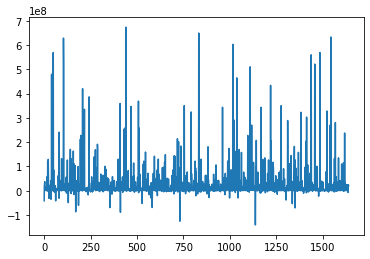

In [41]:
df_r.t.plot()

<AxesSubplot:>

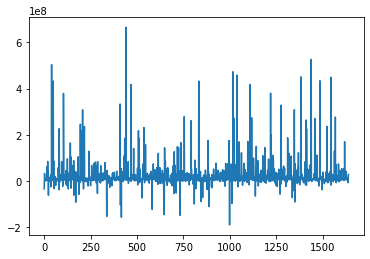

In [42]:
df_r.preds.plot()

# Simple Neural Networks

In [685]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

# Building Model

In [686]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(1, kernel_initializer='normal', activation='linear'),
    Dropout(0.2)
  ])
  return model
# build the model
model = build_model_using_sequential()

# Setting Loss Function

In [687]:
X = df_c[['t3',"t2","t1"]]
y = df_c.t
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.1)

In [688]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    X_train, 
    y_train, 
    epochs=10, 
    batch_size=16,
    validation_split=0.2
)

Epoch 1/10
361/361 [==============================] - 2s 5ms/step - loss: 0.1530 - mean_squared_logarithmic_error: 0.1527 - val_loss: 0.1469 - val_mean_squared_logarithmic_error: 0.1454
Epoch 2/10
361/361 [==============================] - 2s 5ms/step - loss: 0.1533 - mean_squared_logarithmic_error: 0.1530 - val_loss: 0.1469 - val_mean_squared_logarithmic_error: 0.1454
Epoch 3/10
361/361 [==============================] - 2s 4ms/step - loss: 0.1533 - mean_squared_logarithmic_error: 0.1532 - val_loss: 0.1469 - val_mean_squared_logarithmic_error: 0.1454
Epoch 4/10
361/361 [==============================] - 2s 5ms/step - loss: 0.1533 - mean_squared_logarithmic_error: 0.1550 - val_loss: 0.1469 - val_mean_squared_logarithmic_error: 0.1454
Epoch 5/10
361/361 [==============================] - 2s 4ms/step - loss: 0.1533 - mean_squared_logarithmic_error: 0.1531 - val_loss: 0.1469 - val_mean_squared_logarithmic_error: 0.1454
Epoch 6/10
361/361 [==============================] - 2s 5ms/step - lo

In [689]:
preds = model.predict(X_test)

In [693]:
y_test

5184    2.221523
7580   -0.237377
1479   -0.414052
5061   -0.144525
5287   -0.384481
          ...   
4457   -0.230562
1130   -0.495545
2709   -0.196543
4867    1.447501
1902   -0.210113
Name: t, Length: 801, dtype: float64

In [691]:
preds

array([[ -20.855267 ],
       [ -19.080822 ],
       [  -9.421783 ],
       [  -7.3680944],
       [  -9.405987 ],
       [  -9.0738735],
       [ -14.730392 ],
       [  -9.468772 ],
       [  -7.7501287],
       [  -7.7528963],
       [ -10.835547 ],
       [ -11.598635 ],
       [ -11.693205 ],
       [ -11.620976 ],
       [  -9.608858 ],
       [  -9.591774 ],
       [ -18.12954  ],
       [ -18.280157 ],
       [  -9.055664 ],
       [  -8.879978 ],
       [  -7.763968 ],
       [  -8.760403 ],
       [  -8.404985 ],
       [ -25.338919 ],
       [ -33.80461  ],
       [  -9.908052 ],
       [ -10.034223 ],
       [  -7.01532  ],
       [  -9.718874 ],
       [  -9.357206 ],
       [  -6.05991  ],
       [ -11.61669  ],
       [  -8.365034 ],
       [ -15.555387 ],
       [  -8.614773 ],
       [  -6.2595463],
       [  -9.824421 ],
       [  -9.383749 ],
       [ -10.406304 ],
       [  -9.259548 ],
       [ -15.5214   ],
       [ -10.533876 ],
       [ -81.39757  ],
       [  -

In [692]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, preds)
r2

-175.50643685262108

# Linear Regression

In [154]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [155]:
regr = LinearRegression()
  
regr.fit(X_train, y_train)

LinearRegression()

In [156]:

y_pred = regr.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
print(r2)

Mean Absolute Error: 29984806.328877944
Mean Squared Error: 1.2939032562517898e+16
Root Mean Squared Error: 113749868.40659596
0.4795020199244542


In [ ]:
re